# *Taller 2: operaciones de transformación del histograma*

*Angie Gutiérrez - 202223607*

*Santiago Gómez - 202315097*

*Grupo 3*

In [ ]:
# Imports necesarios
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

# **Calibración del histograma (o expansión del contraste)**

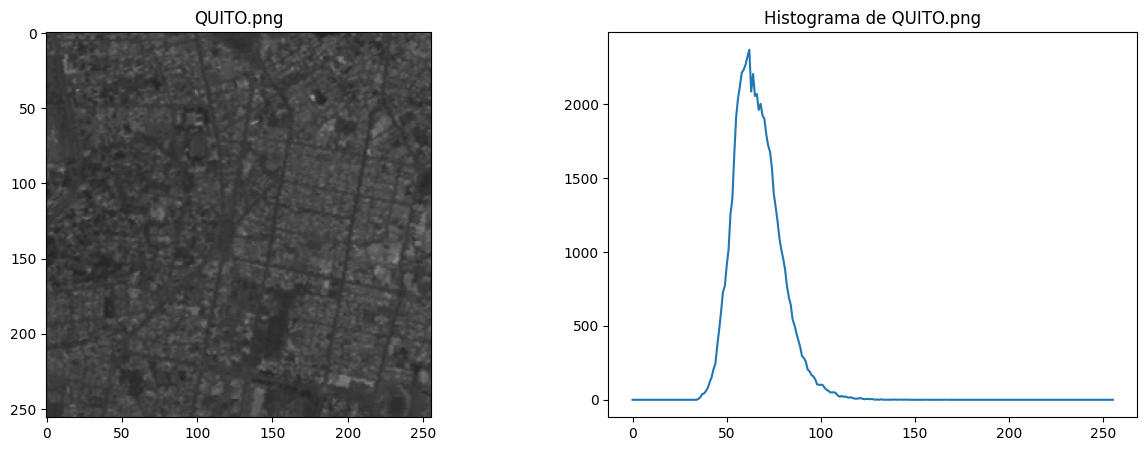


El valor máximo de quito es: 166 y el valor mínimo es: 35


In [ ]:
# Carga QUITO.png
quito = cv2.imread('images/QUITO.png', cv2.IMREAD_GRAYSCALE)

# Histograma de QUITO.png
hist_quito = cv2.calcHist([quito], [0], None, [256], [0,256])

# Visualización de QUITO.png y su histograma
fig_quito, ax_quito = plt.subplots(1, 2, figsize= (15, 5))
ax_quito[0].imshow(quito, cmap='gray', vmin=0, vmax=255); ax_quito[0].set_title('QUITO.png')
ax_quito[1].plot(hist_quito); ax_quito[1].set_title('Histograma de QUITO.png')
plt.show()

# Valores mínimos y máximo (exactitud)
max_quito = np.max(quito)
min_quito = np.min(quito)
print(f'\nEl valor máximo de quito es: {max_quito} y el valor mínimo es: {min_quito}')

**Describa su forma. ¿Cuáles son los niveles de gris mínimo y máximo?**

En el histograma de Quito se puede evidenciar una forma unimodal y estrecha dado que la mayoría de los píxeles están concentrados en un rango pequeño de intensidades.

Al visualizar los niveles de grises en el hist no tuvimos seguridad del rango, por lo cual, imprimos el máximo y el mínimo.

* Rango de niveles de grises: (min = 35 , max = 166)

Como los valores están lejos del rango completo 0-255, la imagen tiene un bajo contraste y se ve predominantemente grisácea.

### **Expansión del contraste de QUITO.png**

Es una calibración de los valores originales que en este caso son:
* (35, 166)

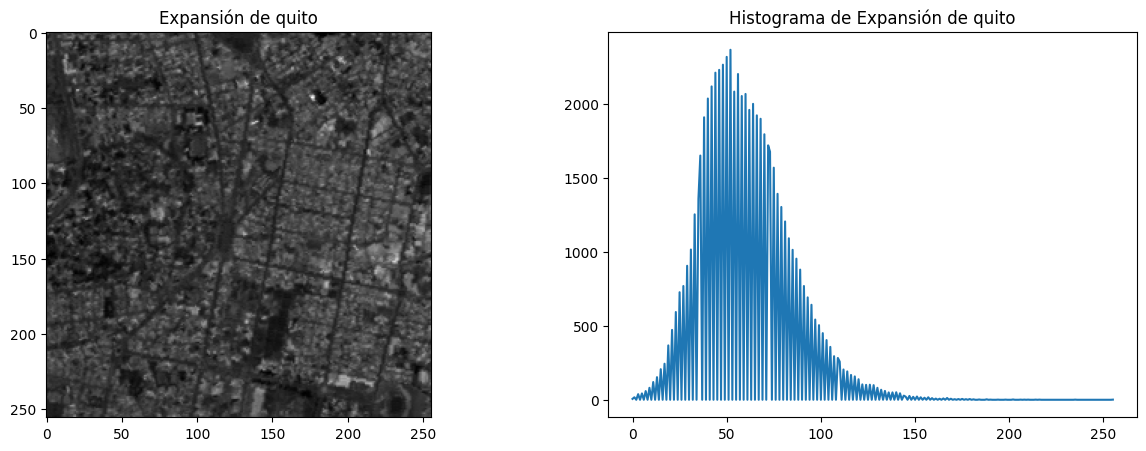

In [ ]:
# Expansión de hist_quito
rescaled_quito = exposure.rescale_intensity(quito, in_range=(min_quito,max_quito), out_range=(0,255))

# IMPORTANTE: A veces rescale_intensity devuelve floats, entonces
# Convertiremos la imagen reescalada a uint8
rescaled_quito = rescaled_quito.astype(np.uint8)

# Histograma de quito
hist_rescaled_quito = cv2.calcHist([rescaled_quito], [0], None, [256], [0,256])

# Visualización de expansión de quito y su histograma
fig_expansion_quito, ax_expansion_quito = plt.subplots(1,2, figsize=(15, 5))
ax_expansion_quito[0].imshow(rescaled_quito, cmap='gray', vmin= 0, vmax= 255); ax_expansion_quito[0].set_title('Expansión de quito')
ax_expansion_quito[1].plot(hist_rescaled_quito); ax_expansion_quito[1].set_title('Histograma de Expansión de quito')
plt.show()

**¿En qué consiste la mejora de la imagen?**

El trabajo que hicimos con exposure.rescale_intensity() fue la expansión de la imagen original, es decir, aplicamos la fórmula de expansión lineal para que el 35 se convierta en 0 y el 166 en 255:

$$g(x,y) = \frac{f(x,y) - \min}{\max - \min} \times 255$$

Realmente, con esta expansión aprovechamos todo el rango disponible y el histograma es estirado. En la imagen reescalada se pueden ver las diferencias de intensidad entre las calles y los edificios, haciendo que los negros sean más negros y los blancos más blancos, lo que facilita la interpretación visual de la escena urbana.


### **Calibración del contraste de QUITO.png**

Vamos a efectuar 3 calibraciones diferentes del histograma sobre la imagen original, entre los valores:
1. (50-100)
2. (40-120)
3. (35-166)

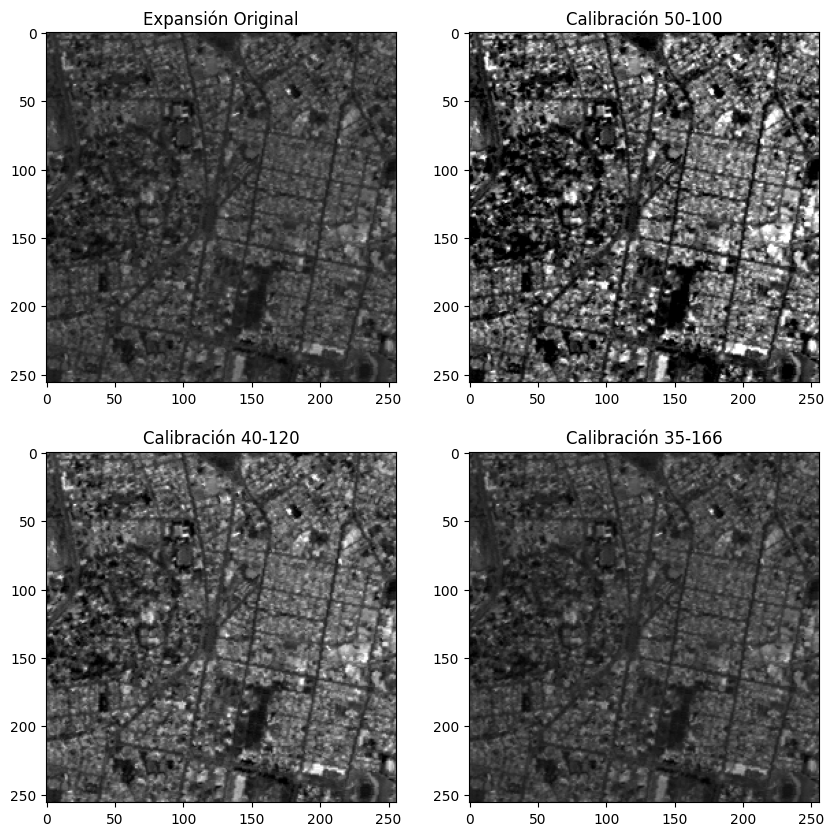

In [ ]:
# Calibración entre 50-100
rescaled_quito_50_100 = exposure.rescale_intensity(quito, in_range= (50, 100), out_range= (0,255))
rescaled_quito_40_120 = exposure.rescale_intensity(quito, in_range= (40, 120), out_range= (0,255))
rescaled_quito_35_166 = exposure.rescale_intensity(quito, in_range= (35, 166), out_range= (0, 255))

# Conversión a np.uint8 para su visualización
rescaled_quito_50_100 = rescaled_quito_50_100.astype(np.uint8)
rescaled_quito_40_120 = rescaled_quito_40_120.astype(np.uint8)
rescaled_quito_35_166 = rescaled_quito_35_166.astype(np.uint8)

# Visualización de quito reescalada 50-100
fig_calibration, ax_calibration = plt.subplots(2, 2, figsize= (10, 10))
# axes con titulos
ax_calibration[0, 0].imshow(rescaled_quito, cmap= 'gray', vmin= 0, vmax= 255); ax_calibration[0, 0].set_title('Expansión Original')
ax_calibration[0, 1].imshow(rescaled_quito_50_100, cmap= 'gray', vmin= 0, vmax= 255); ax_calibration[0, 1].set_title('Calibración 50-100')
ax_calibration[1, 0].imshow(rescaled_quito_40_120, cmap= 'gray', vmin= 0, vmax= 255); ax_calibration[1, 0].set_title('Calibración 40-120')
ax_calibration[1, 1].imshow(rescaled_quito_35_166, cmap= 'gray', vmin= 0, vmax= 255); ax_calibration[1, 1].set_title('Calibración 35-166')
plt.show()

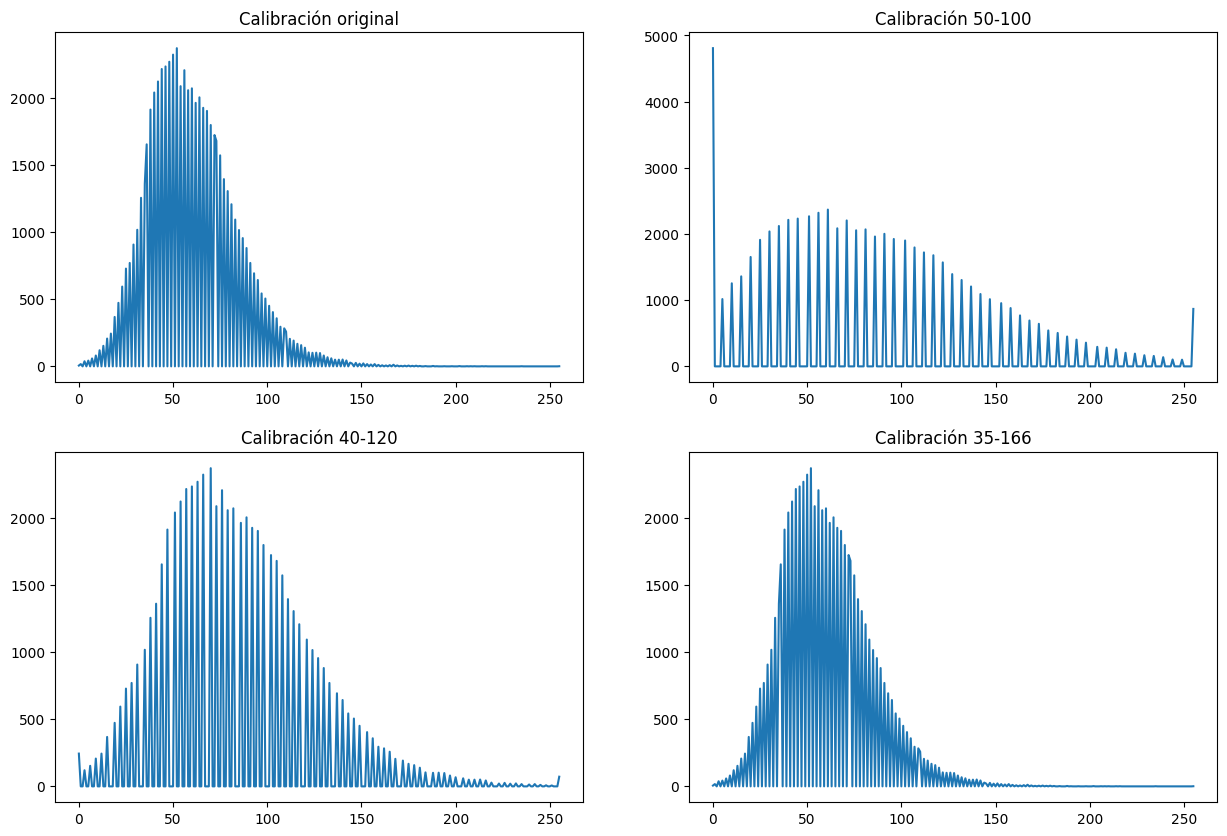

In [ ]:
# Histogramas de las calibraciones
hist_rescaled_quito_50_100 = cv2.calcHist([rescaled_quito_50_100], [0], None, [256], [0,256])
hist_rescaled_quito_40_120 = cv2.calcHist([rescaled_quito_40_120], [0], None, [256], [0,256])
hist_rescaled_quito_35_166 = cv2.calcHist([rescaled_quito_35_166], [0], None, [256], [0,256])

# Visualización de los histogramas de las calibraciones
fig_hist_calibration, ax_hist_calibration = plt.subplots(2, 2, figsize= (15, 10))
ax_hist_calibration[0, 0].plot(hist_rescaled_quito); ax_hist_calibration[0, 0].set_title('Calibración original')
ax_hist_calibration[0, 1].plot(hist_rescaled_quito_50_100); ax_hist_calibration[0, 1].set_title('Calibración 50-100')
ax_hist_calibration[1, 0].plot(hist_rescaled_quito_40_120); ax_hist_calibration[1, 0].set_title('Calibración 40-120')
ax_hist_calibration[1, 1].plot(hist_rescaled_quito_35_166); ax_hist_calibration[1, 1].set_title('Calibración 35-166')
plt.show()

### **PREGUNTAS FINALES**


**¿Cuál es la diferencia entre estas imágenes?**

La diferencia son los valores de entrada de la calibración porque se están recortando los valores de gris y se están dejando de lado los detalles en los extremos (nos estamos enfocando en una ventana específica).
¨
* Calibración 50-100: Es la ventana más angosta, por lo tanto, muchos píxeles se vuelven blancos (quemar) o se vuelven negros (apagar).

* Calibración 40-120: Es la ventana media que aumenta el contraste a comparación con la original, sin llegar a la saturación extrema de la anterior.

* Calibración 35-166: Es la ventana más equilibrada porque utiliza los límites reales de la imagen.

**¿Cuál presenta el mejor contraste?**

Teniendo en cuenta que el contraste es la diferencia entre el punto más claro y el más oscuro, decimos que la imagen de 50-100 tiene el contraste más alto, pero esta presenta un costo muy alto de pérdida de información.


**¿Cuál permite ver mejor los detalles?**

Realmente la expansión original (35-166) es la que mejor permite ver los detalles porque preserva todas las texturas de los edificios y calles que ya existían, además de hacerlas más visibles al ojo humano.

**¿Por qué la calibración entre 35 y 166 da el mismo resultado que la expansión del contraste efectuada en el punto 4?**

Recordemos que la expansión del contraste consiste en llevar el valor mínimo de la imagen a 0 y el máximo a 255. Dado que el mínimo de QUITO.png es 35 y el máximo es 166, aplicar una calibración manual con esos mismos números ejecuta la misma transformación lineal.

**Conclusión**

La calibración del histograma es una herramienta poderosa para resaltar características específicas. Sin embargo, existe un *trade-off* porque entre más estrecho es el rango de calibración, mayor es el contraste percibido, pero mayor es la pérdida de detalles por saturación en las luces y sombras.

Finalmente, decimos que la expansión global (35-166) es la técnica óptima cuando se desea mejorar la visualización general sin alterar la integridad de los datos originales.

# **Ecualización del histograma**

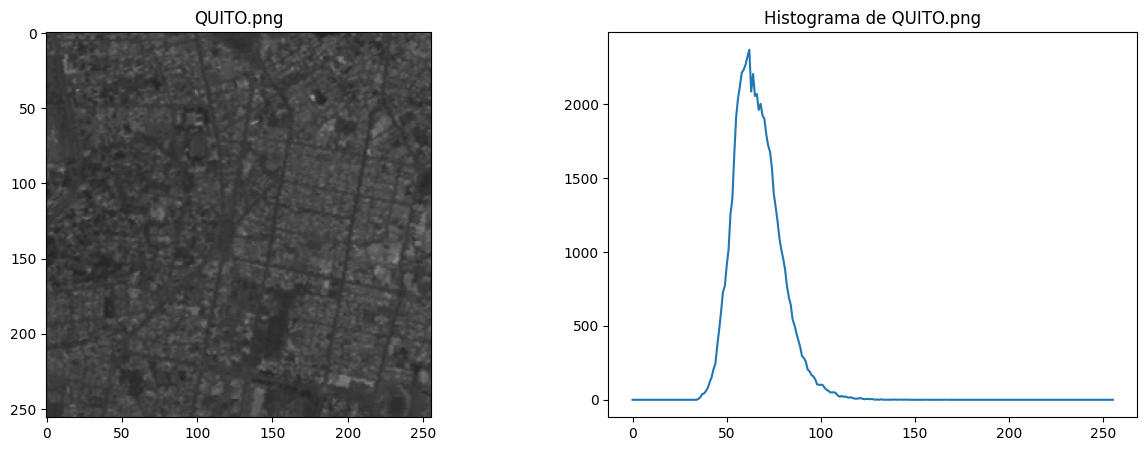

In [ ]:
# Dado que previamente realizamos la carga y el histograma de QUITO.png, sólo vamos a visualizarlas
fig, ax = plt.subplots(1, 2, figsize= (15, 5))
ax[0].imshow(quito, cmap='gray', vmin=0, vmax=255); ax[0].set_title('QUITO.png')
ax[1].plot(hist_quito); ax[1].set_title('Histograma de QUITO.png')
plt.show()

### **Ecualización de QUITO.png**

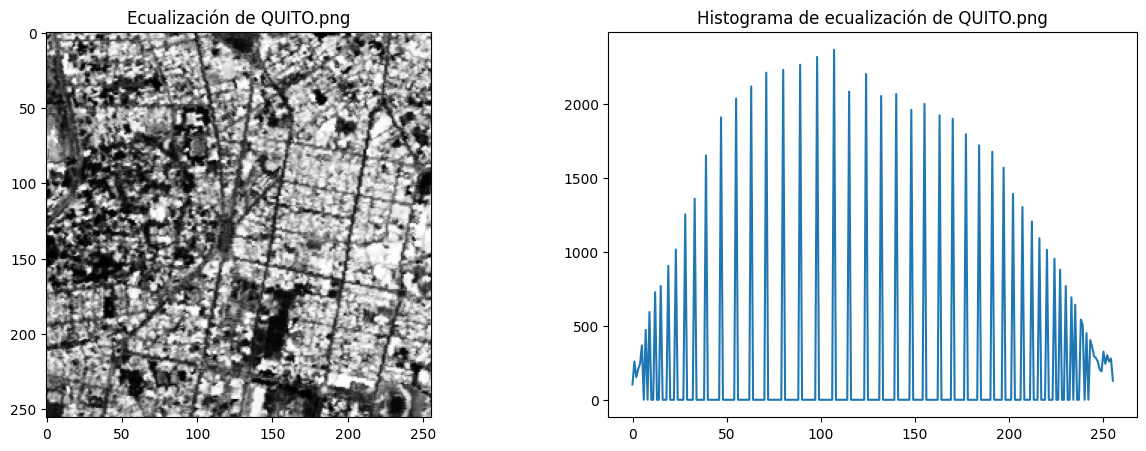

In [ ]:
# Ecualización de QUITO.png
equalized_quito = cv2.equalizeHist(quito)

# Histograma de quito ecualizada
hist_equalized_quito = cv2.calcHist([equalized_quito], [0], None, [256], [0,256])

# Visualización de ecualización
fig_equalized_quito, ax_equalized_quito = plt.subplots(1, 2, figsize= (15, 5))
ax_equalized_quito[0].imshow(equalized_quito, cmap='gray', vmin=0, vmax=255); ax_equalized_quito[0].set_title('Ecualización de QUITO.png')
ax_equalized_quito[1].plot(hist_equalized_quito); ax_equalized_quito[1].set_title('Histograma de ecualización de QUITO.png')
plt.show()

**¿A qué se debe la discontinuidad del histograma ecualizado?**

Recordemos que la ecualización intenta redistribuir los píxeles para que el histograma sea lo más uniforme posible. Dado que las imágenes digitales presentan niveles de gris discretos (enteros del 0 al 255), no es posible crear niveles de intensidad intermedios o "medios píxeles" (como un nivel 50.5).

Esta discontinuidad, conocida visualmente como *efecto de peine*, se debe principalmente a dos factores:

1. Como la ecualización utiliza la *Función de Distribución Acumulada (CDF)* para reasignar los valores de gris originales, en las zonas donde el histograma inicial tenía una alta concentración de píxeles (picos), la pendiente de la CDF es muy pronunciada. Esto provoca que niveles de gris que originalmente eran consecutivos se "proyecten" a valores de salida muy distantes entre sí para cubrir el rango dinámico.

2. Al estirar estos grupos de píxeles hacia zonas previamente vacías, los niveles intermedios entre ellos quedan con una frecuencia de cero. Como el sistema no puede inventar nuevos datos tonales para rellenar esos huecos, se generan los saltos o vacíos que observamos en la gráfica.

### **Doble ecualización a QUITO.png**

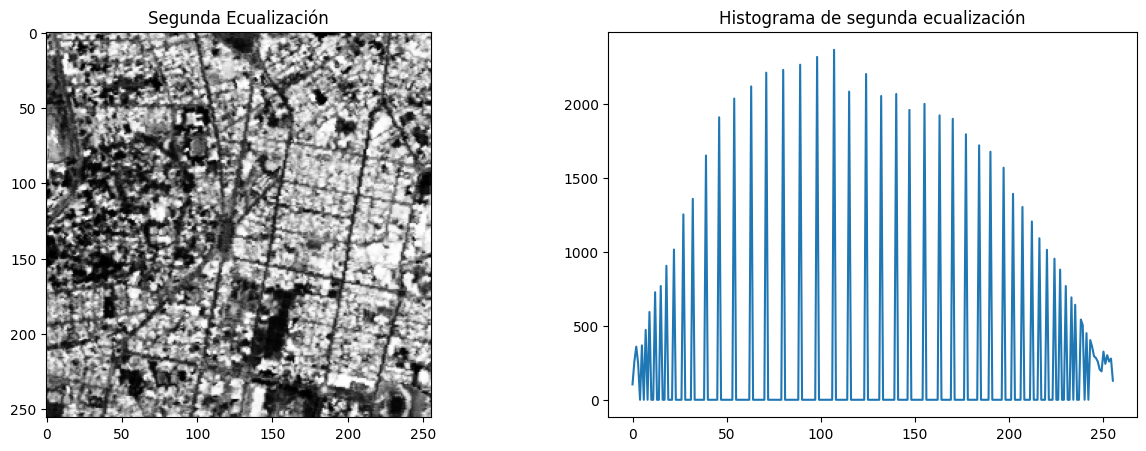

In [ ]:
# Segunda ecualización a Quito
equalized_quito2 = cv2.equalizeHist(equalized_quito)

# Histograma a segunda ecualización
hist_equalized_quito2 = cv2.calcHist([equalized_quito2], [0], None, [256], [0,256])

# Visualización de segunda ecualización
fig_equalized_quito2, ax_equalized_quito2 = plt.subplots(1, 2, figsize= (15,5))
ax_equalized_quito2[0].imshow(equalized_quito2, cmap = 'gray'); ax_equalized_quito2[0].set_title('Segunda Ecualización')
ax_equalized_quito2[1].plot(hist_equalized_quito2); ax_equalized_quito2[1].set_title('Histograma de segunda ecualización')
plt.show()

**¿Qué pasa? ¿Por qué?**

Al realizar una segunda ecualización sobre la imagen ya ecualizada NO se producen cambios significativos porque la ecualización es una operación que tiende a la idempotencia.

Dado que la primera aplicación ya transformó el histograma en una distribución aproximadamente uniforme, la Función de Distribución Acumulada (CDF) de la imagen resultante es ahora una recta lineal. Por lo tanto, cualquier intento posterior de ecualización simplemente mapea los niveles de gris sobre sí mismos, manteniendo la imagen inalterada.

### **Ecualización de BABOON.png**

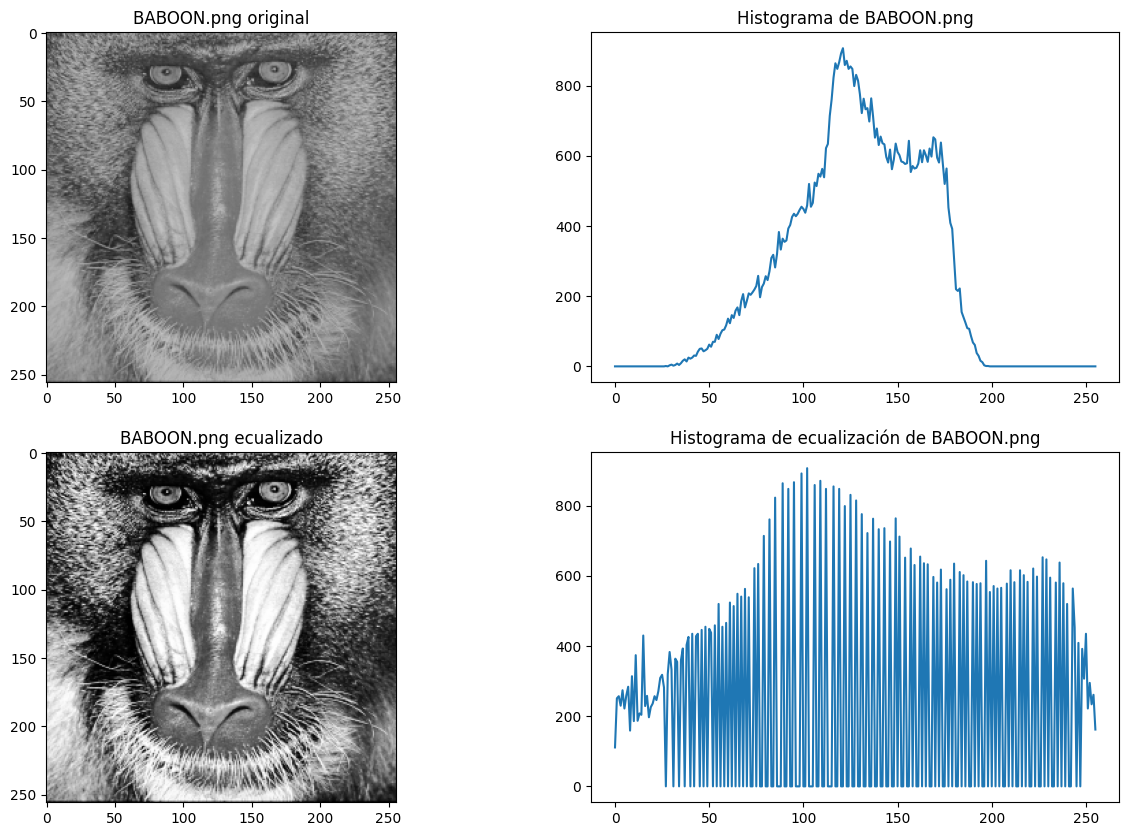

In [ ]:
# Carga de BABOON.png
baboon = cv2.imread('images/BABOON.png', cv2.IMREAD_GRAYSCALE)

# Histograma de BABOON.png
hist_baboon = cv2.calcHist([baboon], [0], None, [256], [0, 256])

# Ecualización de BABOON.png
equalized_baboon = cv2.equalizeHist(baboon)

# Histograma de ecualización de BABOON.png
hist_equalized_baboon = cv2.calcHist([equalized_baboon], [0], None, [256], [0,256])

# Visualización de BABOON.png y su histograma
fig_baboon, ax_baboon = plt.subplots(2, 2, figsize= (15, 10))
ax_baboon[0, 0].imshow(baboon, cmap='gray', vmin=0, vmax=255); ax_baboon[0, 0].set_title('BABOON.png original')
ax_baboon[0, 1].plot(hist_baboon); ax_baboon[0, 1].set_title('Histograma de BABOON.png')
ax_baboon[1, 0].imshow(equalized_baboon, cmap='gray', vmin=0, vmax=255); ax_baboon[1, 0].set_title('BABOON.png ecualizado')
ax_baboon[1, 1].plot(hist_equalized_baboon); ax_baboon[1, 1].set_title('Histograma de ecualización de BABOON.png')
plt.show()

**¿Cómo es el resultado de esta transformación comparado con la ecualización de la imagen precedente (quito.png)? ¿Por qué?**

Al comparar la ecualización de BABOON.png con la de QUITO.png, se observa que el resultado en el mandril es menos efectivo y presenta una saturación excesiva en los extremos tonales. Esto se debe a que el histograma original de Baboon ya cubría un rango dinámico considerable. La ecualización, al intentar uniformar una distribución que ya estaba dispersa, fuerza los niveles de gris hacia el negro y blanco puros, provocando una pérdida de detalle en texturas finas (como el pelaje) que no ocurrió en Quito, donde el histograma original estaba mucho más comprimido.

# **Comparación entre diferentes transformaciones del histograma**

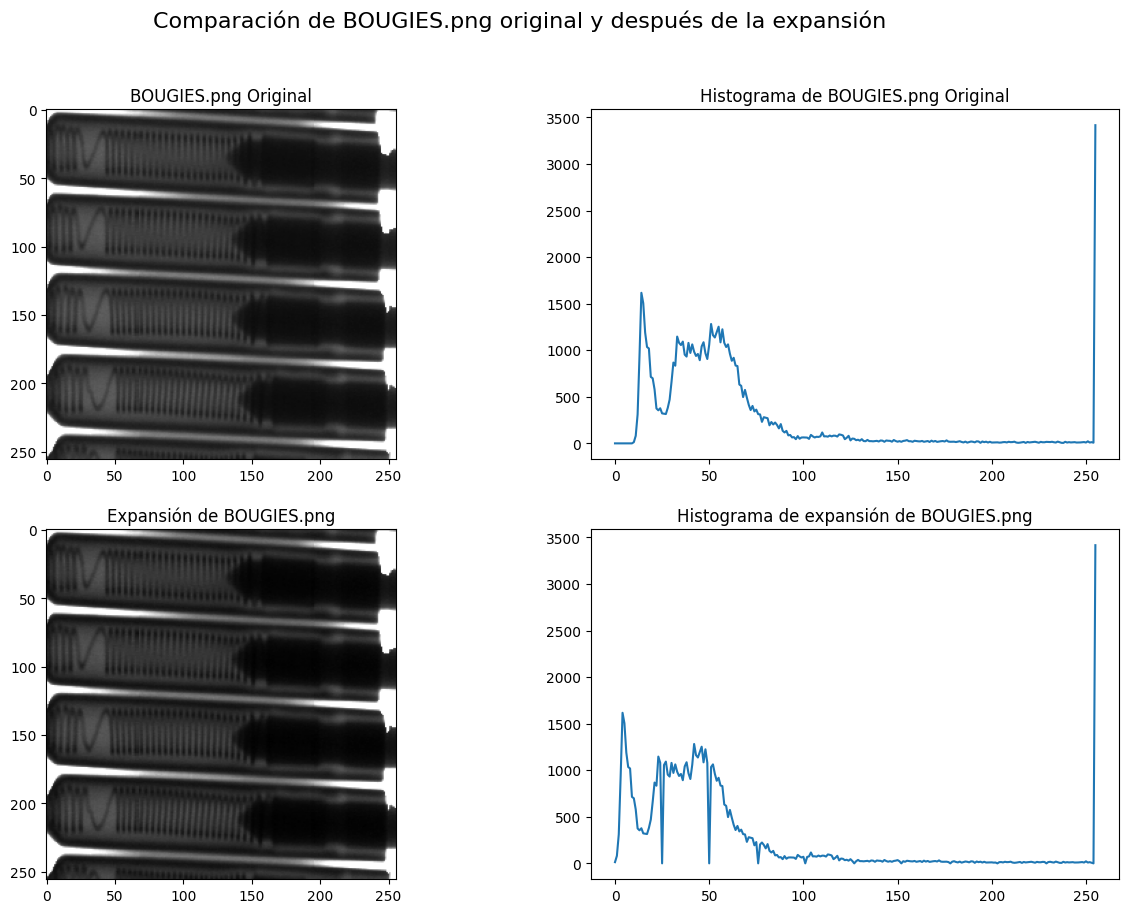


Valores mínimos y máximos de BOUGIES.png: (10, 255)


In [ ]:
# Carga de BOUGIES.png
bougies = cv2.imread('images/BOUGIES.png', cv2.IMREAD_GRAYSCALE)

# Histograma de BOUGIES.png
hist_bougies = cv2.calcHist([bougies], [0], None, [256], [0,256])

# Valores mínimos y máximos de BOUGIES.png
max_bougies = np.max(bougies)
min_bougies = np.min(bougies)

# Expansión de BOUGIES.png
rescaled_bougies = exposure.rescale_intensity(bougies, in_range=(min_bougies, max_bougies), out_range=(0,255))

# Histograma de expansión de BOUGIES.png
hist_rescaled_bougies = cv2.calcHist([rescaled_bougies.astype(np.uint8)], [0], None, [256], [0,256])

# Comparación de BOUGIES.png original y después de la expansión
fig_bougies, ax_bougies = plt.subplots(2, 2, figsize= (15, 10))
ax_bougies[0, 0].imshow(bougies, cmap='gray', vmin=0, vmax=255); ax_bougies[0, 0].set_title('BOUGIES.png Original')
ax_bougies[0, 1].plot(hist_bougies); ax_bougies[0, 1].set_title('Histograma de BOUGIES.png Original')
ax_bougies[1, 0].imshow(rescaled_bougies.astype(np.uint8), cmap='gray', vmin=0, vmax=255); ax_bougies[1, 0].set_title('Expansión de BOUGIES.png')
ax_bougies[1, 1].plot(hist_rescaled_bougies); ax_bougies[1, 1].set_title('Histograma de expansión de BOUGIES.png')

# Título de la figura sobre la comparación
fig_bougies.suptitle('Comparación de BOUGIES.png original y después de la expansión', fontsize=16)

plt.show()

# Impresión de valores mínimos y máximos
print(f'\nValores mínimos y máximos de BOUGIES.png: ({min_bougies}, {max_bougies})')

**¿A qué se debe este resultado?**

El resultado de la expansión en BOUGIES.png es casi que imperceptible debido a que la imagen original posee un rango dinámico casi que COMPLETO (10, 255). Al existir píxeles con intensidad mínima cercana a 0 y máxima en 255, la transformación lineal no tiene espacio para estirar el histograma, resultando en una imagen de salida casi que idéntica a la original. Realmente sólo se nota un oscurecimiento mayor producido al incluir los tonos de gris 0-10.

Lo anterior, demuestra que la expansión del contraste solo es efectiva en imágenes con histogramas comprimidos o estrechos.

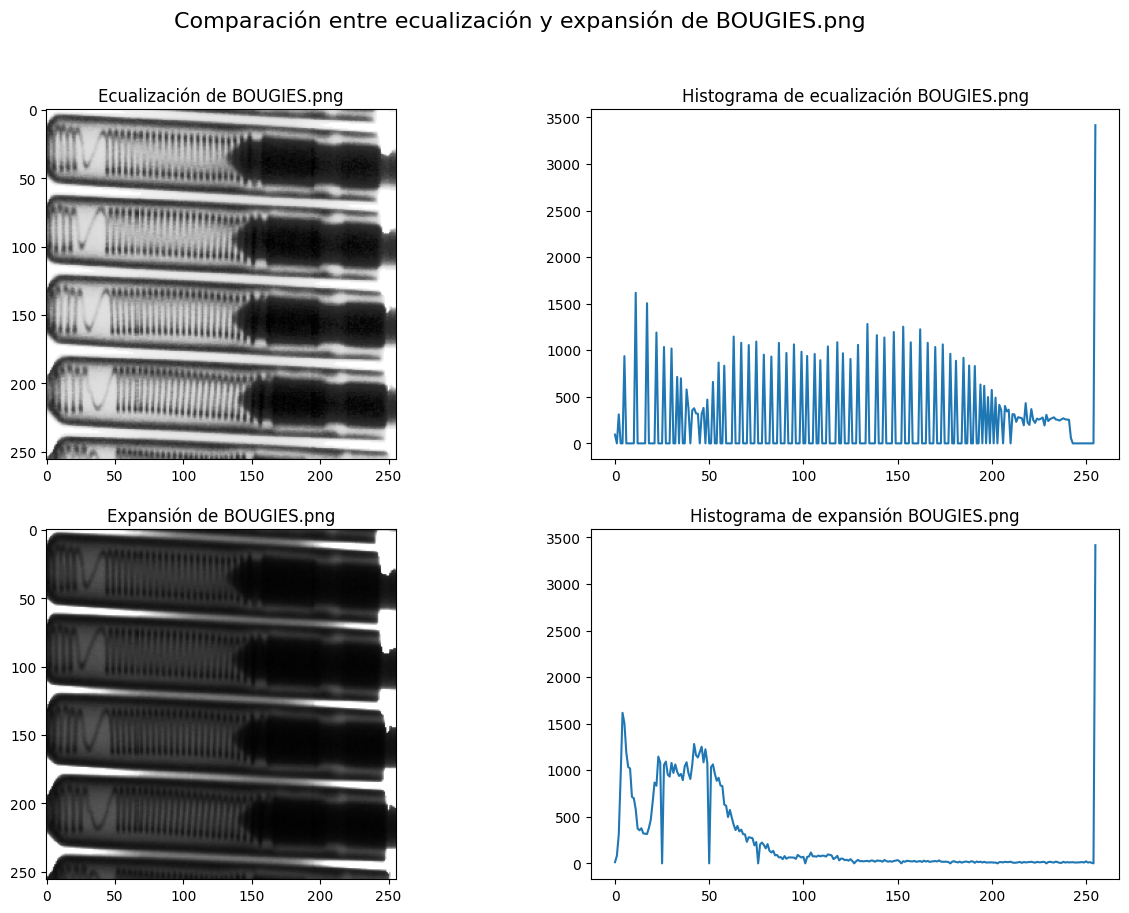

In [ ]:
# Ecualización de BOUGIES.png
equalized_bougies = cv2.equalizeHist(bougies)

# Histograma de ecualización de BOUGIES.png
hist_equalized_bougies = cv2.calcHist([equalized_bougies], [0], None, [256], [0, 256])

# Comparación entre ecualización y expansión de BOUGIES.png
fig_exp_vs_eq, ax_exp_vs_eq = plt.subplots(2, 2, figsize= (15, 10))
ax_exp_vs_eq[0, 0].imshow(equalized_bougies, cmap= 'gray', vmin= 0, vmax= 255); ax_exp_vs_eq[0, 0].set_title('Ecualización de BOUGIES.png')
ax_exp_vs_eq[0, 1].plot(hist_equalized_bougies); ax_exp_vs_eq[0, 1].set_title('Histograma de ecualización BOUGIES.png')
ax_exp_vs_eq[1, 0].imshow(rescaled_bougies, cmap= 'gray', vmin= 0, vmax= 255); ax_exp_vs_eq[1, 0].set_title('Expansión de BOUGIES.png')
ax_exp_vs_eq[1, 1].plot(hist_rescaled_bougies); ax_exp_vs_eq[1, 1].set_title('Histograma de expansión BOUGIES.png')

fig_exp_vs_eq.suptitle('Comparación entre ecualización y expansión de BOUGIES.png', fontsize=16)
plt.show()

**Resultados**

Al comparar ambos métodos en BOUGIES.png, se observa que la ecualización es notablemente más efectiva para resaltar detalles en las zonas oscuras de la imagen. Mientras que la expansión lineal se ve limitada por la presencia previa de valores extremos (0 y 255) que impiden el reescalado, la ecualización redistribuye la masa de píxeles de forma uniforme según su frecuencia.

Lo anterior se evidencia en el histograma ecualizado, donde la información originalmente comprimida en los tonos oscuros ha sido dispersada por todo el rango dinámico, resultando en una imagen con mayor claridad visual y contraste local, aunque con una apariencia menos natural que la original.

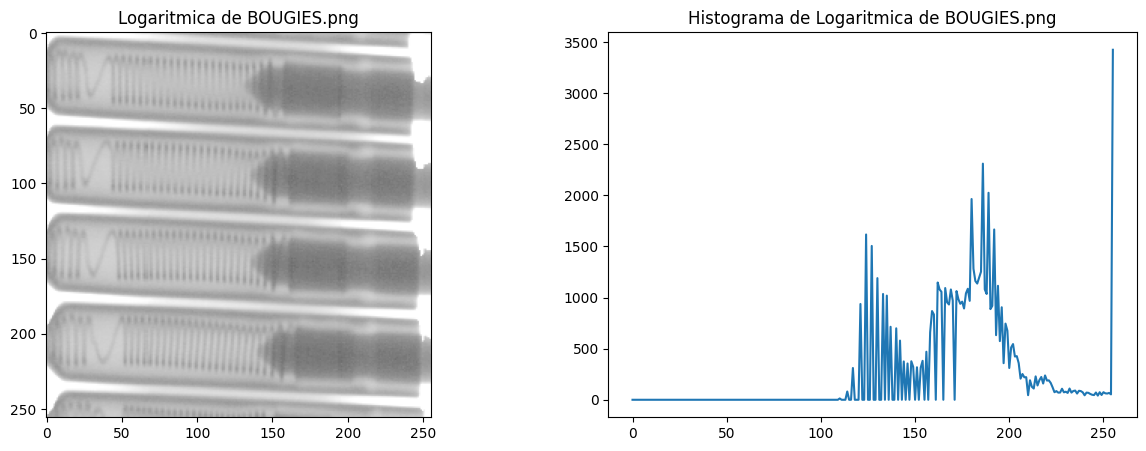

In [ ]:
# Transformación LOGARITMICA de cada pixel s -> r = log(1+s) con np.log1p
log_bougies = np.log1p(bougies)

# Multiplicación de log por 46
c = 46
log_bougies = log_bougies * c

# Histograma de logaritmica de BOUGIES.png
hist_log_bougies = cv2.calcHist([log_bougies.astype(np.uint8)], [0], None, [256], [0, 256])

# Visualización de Log de BOUGIES.png
fig_log_bougies, ax_log_bougies = plt.subplots(1, 2, figsize= (15, 5))
ax_log_bougies[0].imshow(log_bougies, cmap= 'gray', vmin= 0, vmax= 255); ax_log_bougies[0].set_title('Logaritmica de BOUGIES.png')
ax_log_bougies[1].plot(hist_log_bougies); ax_log_bougies[1].set_title('Histograma de Logaritmica de BOUGIES.png')
plt.show()

**¿Por qué es necesario multiplicar la imagen de salida por un factor?**

Porque es indispensable reescalar el rango de salida de la función logarítmica. Dado que $\log(1+255) \approx 5.54$, el factor de compensación permite que el valor máximo regrese al nivel de saturación de 255 ($5.54 \times 46 \approx 254.8$), haciendo la imagen visible.

**¿Cómo es el histograma resultado?**

El histograma resultante muestra un desplazamiento masivo de los niveles de gris hacia las intensidades medias y altas (lado derecho),resultando en una imagen con gran claridad de detalles en las zonas de sombras (como el cuerpo de las bujías).

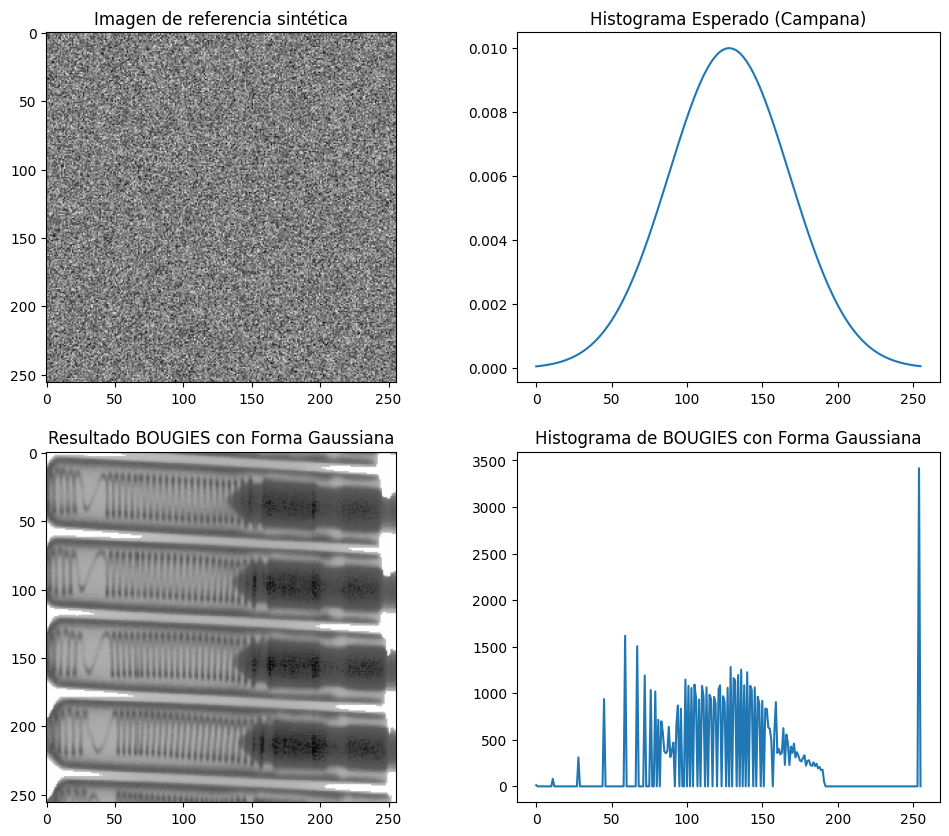

In [ ]:
# Definición de dimensiones basadas en BOUGIES.png
N, M = bougies.shape

# Máximo de valores de intensidades posibles
L = 256
x = np.arange(256)

# Distribución Gaussiana (Campana de Gauss) con promedio = 128 (centro) y desviación = 40 (ancho)
mu = 128
sigma = 40
hist_normal = np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Normalización para que la suma sea 1
hist_normal = hist_normal / np.sum(hist_normal)

#-----------------------------------------------------------------------------------------------
# Generación de la imagen de referencia sintética (suma acumulativa del hist)
cdf = np.cumsum(hist_normal)

# Generamos un arreglo con valores aleatorios según la distribución
pixel_values = np.interp(np.random.rand(N* M), cdf, x)

# Convertimos el arreglo en una imagen
i_to_match = pixel_values.reshape(N, M).astype(np.uint8)
matched_bougies = exposure.match_histograms(bougies, i_to_match)

#----------------------------------------------------------------------------------------------
# Calculo de histograma especificado con hist_normal
hist_matched = cv2.calcHist([matched_bougies.astype(np.uint8)], [0], None, [256], [0, 256])

# Visualización de la ESPECIFICACIÓN
fig_match, ax_match = plt.subplots(2, 2, figsize=(12, 10))

ax_match[0, 0].imshow(i_to_match, cmap='gray', vmin= 0, vmax= 255); ax_match[0, 0].set_title('Imagen de referencia sintética')
ax_match[0, 1].plot(x, hist_normal); ax_match[0, 1].set_title('Histograma Esperado (Campana)')
ax_match[1, 0].imshow(matched_bougies, cmap='gray', vmin= 0, vmax= 255); ax_match[1, 0].set_title('Resultado BOUGIES con Forma Gaussiana')
ax_match[1, 1].plot(x, hist_matched); ax_match[1, 1].set_title('Histograma de BOUGIES con Forma Gaussiana')

plt.show()

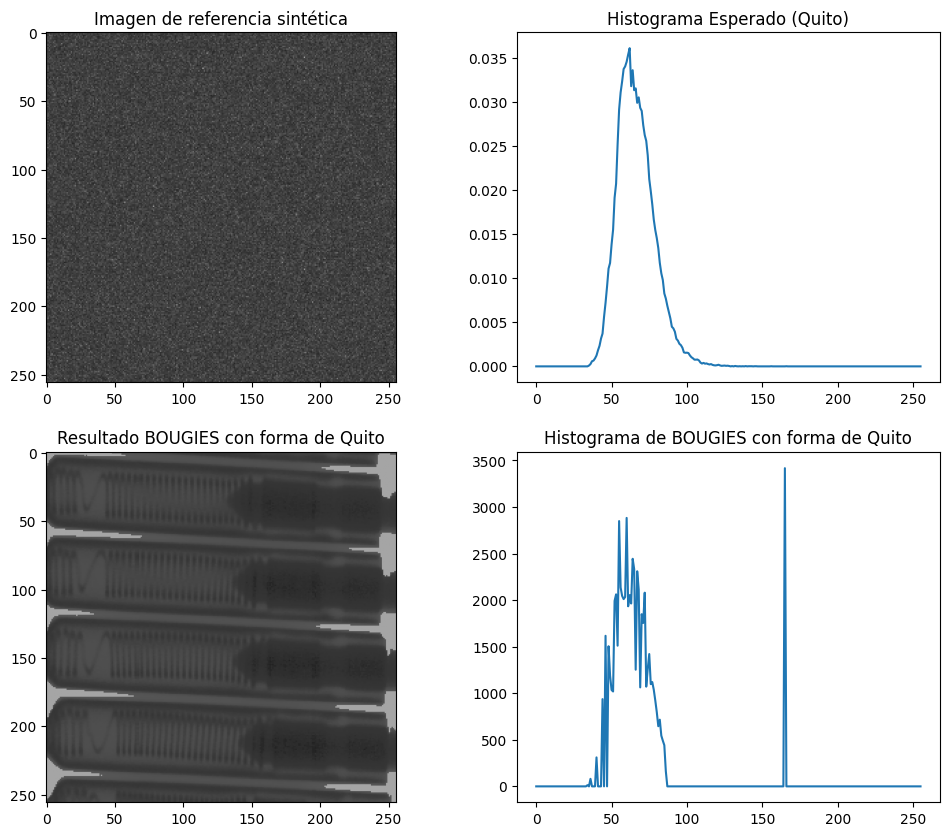

In [ ]:
# SEGUNDO HIST: referencia de QUITO
hist_quito_ref = hist_quito / hist_quito.sum() # Normalización

# Generar imagen de referencia basada en Quito
cdf_quito = np.cumsum(hist_quito_ref)
pixel_values_quito = np.interp(np.random.rand(N * M), cdf_quito, x)
i_to_match_quito = pixel_values_quito.reshape(N, M).astype(np.uint8)

# Aplicar matching
matched_bougies_quito = exposure.match_histograms(bougies, i_to_match_quito)

# Histograma de ESPECIFICACION con quito
hist_matched_quito = cv2.calcHist([matched_bougies_quito.astype(np.uint8)], [0], None, [256], [0, 256])

# Visualización del segundo hist y especificación con este
fig_match_quito, ax_match_quito = plt.subplots(2, 2, figsize=(12, 10))
ax_match_quito[0,0].imshow(i_to_match_quito, cmap='gray', vmin=0, vmax=255); ax_match_quito[0,0].set_title('Imagen de referencia sintética')
ax_match_quito[0,1].plot(x, hist_quito_ref); ax_match_quito[0,1].set_title('Histograma Esperado (Quito)')
ax_match_quito[1,0].imshow(matched_bougies_quito, cmap='gray', vmin=0, vmax=255); ax_match_quito[1,0].set_title('Resultado BOUGIES con forma de Quito')
ax_match_quito[1,1].plot(x, hist_matched_quito); ax_match_quito[1,1].set_title('Histograma de BOUGIES con forma de Quito')
plt.show()

**Especificación de Histogramas (Histogram Matching)**

Este método calcula la CDF de la imagen original (BOUGIES) y la CDF de la imagen de referencia (sintética o real). Se busca para cada nivel de gris de la imagen original, el nivel de gris en la referencia que tenga el mismo valor de probabilidad acumulada.


**Comparación de Resultados**

1. Especificación Gaussiana (Campana de Gauss):
Esta logra rescatar la textura de la cera y los resortes internos de las bujías con transiciones de grises naturales y suaves, gracias a que concentra la mayoría de los píxeles en los tonos medios ($\mu = 128$).
De hecho, el histograma resultante muestra una dispersión armónica, donde NO hay picos agresivos de saturación en los extremos.

2. Especificación con Quito:
Esta muestra una imagen más contrastada y ligeramente más oscura que la Gaussiana. Lo cual puede explicarse con el histograma de Quito que tiene su mayor densidad de píxeles en el rango de $50$ a $80$ (tonos oscuros-medios).

Al comparar con los métodos anteriores vemos que la especificación no sólo obliga a BOUGIES a adoptar el rango dinámica, sino *la forma estadística de la referencia.*

### **CONCLUSIONES TIPOS DE TRANSFORMACIONES**

**¿Qué impactos tiene cada una?**

1. Expansión y Calibración Lineal
* Realiza un reescalado directo de los niveles de gris para que el mínimo de la imagen sea 0 y el máximo sea 255. Sin embargo, el impacto será NULO si la imagen ya posee valores en los extremos.
* Es ideal para imágenes capturadas con sensores de bajo rango dinámico o subexpuestas, donde se desea aumentar el contraste global sin alterar la relación proporcional entre los niveles de gris originales.

2. Ecualización Global
* Busca una distribución uniforme de los píxeles (aumenta el contraste), pero suele generar discontinuidades (efecto de peine) en el histograma debido a la naturaleza discreta de los niveles de gris. Además, puede saturar áreas y perder texturas finas en imágenes que ya tienen un histograma disperso.
* Es ideal si se requiere resaltar detalles en imágenes con histogramas muy comprimidos o sesgados.

3. Transformaciones No Lineales (Logarítmica)
* Comprime los valores altos de intensidad y expande los valores bajos, pero requiere un factor de corrección (como $c=46$) para devolver la imagen al rango visible.
* Es ideal para visualizar detalles en regiones muy oscuras (sombras) sin "quemar" las zonas de alta luminosidad. Es muy común en imágenes médicas y satelitales donde la información crítica está en los tonos bajos.

4. Especificación de Histograma (Matching)
* Obliga a una imagen a adoptar la distribución estadística de una referencia (imagen o una función matemática).
* Es la técnica más sofisticada porque permite un control personalizado del contraste y el brillo. La especificación Gaussiana es preferida para lograr una apariencia natural y profesional por su concentración en tonos medios.

**Conclusión sobre la Calidad de Imagen**

El mejoramiento de la calidad de la imagen no depende de una sola técnica "superior", sino de la naturaleza del histograma de entrada:

* Se escoge la expansión lineal para corregir exposición.

* Se prefiere la ecualización o el log para análisis de texturas ocultas.

* Se opta por la especificación Gaussiana para un mejoramiento estético y técnico equilibrado.

# **Umbralización simple**



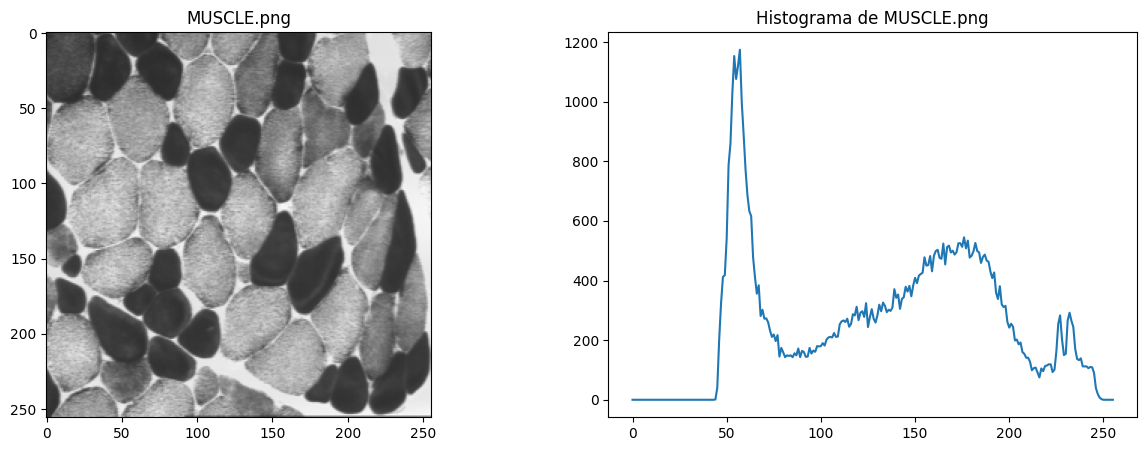


Valores mínimos y máximos de MUSCLE.png: (44, 249)


In [ ]:
# Carga de MUSCLE.png
muscle = cv2.imread('images/MUSCLE.png', cv2.IMREAD_GRAYSCALE)

# Valores mínimos y máximos de MUSCLE.png
max_muscle = np.max(muscle)
min_muscle = np.min(muscle)

# Histograma de MUSCLE.png
hist_muscle = cv2.calcHist([muscle], [0], None, [256], [0, 256])

# Visualización de MUSCLE.png
fig_muscle, ax_muscle = plt.subplots(1, 2, figsize= (15, 5))
ax_muscle[0].imshow(muscle, cmap = 'gray', vmin= 0, vmax= 255); ax_muscle[0].set_title('MUSCLE.png')
ax_muscle[1].plot(hist_muscle); ax_muscle[1].set_title('Histograma de MUSCLE.png')
plt.show()

print(f'\nValores mínimos y máximos de MUSCLE.png: ({min_muscle}, {max_muscle})')


**¿Cuál es el valor S de nivel de gris que permite separar aproximadamente las fibras oscuras del resto de la imagen?**

El valor escogido es *S = 90* debido a que en el histograma se distinguen dos regiones principales: un pico pronunciado en intensidades bajas entre 50 y 60 aproximadamente, asociado a las fibras más oscuras, y una distribución más elevada en intensidades altas entre 120 y 200 aproximadamente, correspondiente a las fibras más claras y el fondo. Entre ambos grupos aparece un “valle” donde la frecuencia de píxeles disminuye notablemente, aproximadamente entre 80 y 100. Por lo tanto, seleccionar 90, ubicado en esa zona de mínima superposición, permite separar mejor las fibras negras de las blancas, reduciendo la cantidad de píxeles ambiguos que podrían clasificarse incorrectamente.

### **Calibración de MUSCLE.png**

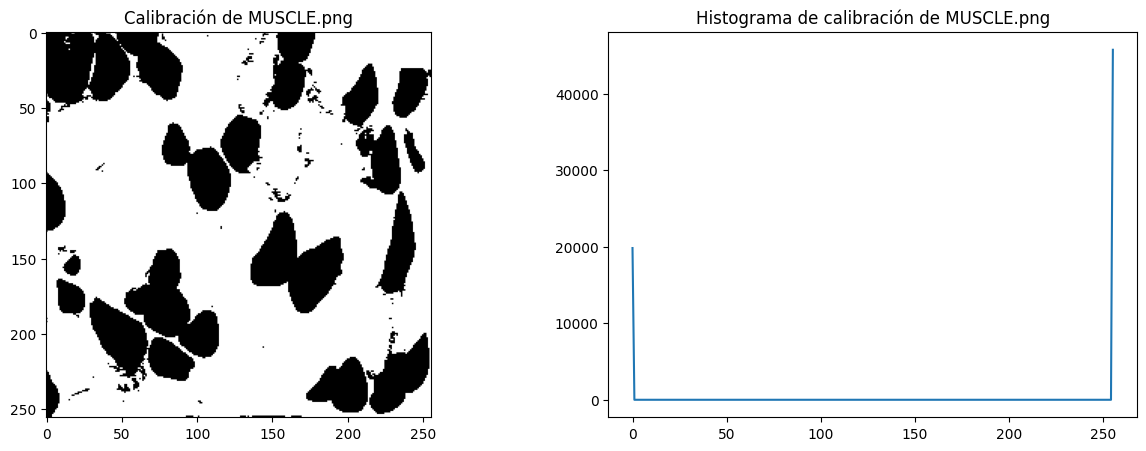

In [ ]:
# Calibración
S = 90
rescaled_muscle = exposure.rescale_intensity(muscle, in_range=(S, S+1), out_range=(0,255))
rescaled_muscle = rescaled_muscle.astype(np.uint8)

# Histograma de calibración de MUSCLE.png
hist_rescaled_muscle = cv2.calcHist([rescaled_muscle], [0], None, [256], [0, 256])

# Visualización de calibración de MUSCLE.png y su histograma
fig_calib_muscle, ax_calib_muscle = plt.subplots(1, 2, figsize= (15, 5))
ax_calib_muscle[0].imshow(rescaled_muscle, cmap='gray', vmin=0, vmax=255); ax_calib_muscle[0].set_title('Calibración de MUSCLE.png')
ax_calib_muscle[1].plot(hist_rescaled_muscle); ax_calib_muscle[1].set_title('Histograma de calibración de MUSCLE.png')
plt.show()

**¿Cuál es su conclusión?**

La calibración utilizada ha actuado efectivamente como una umbralización simple (binarización) porque al definir un rango de entrada extremadamente estrecho como S a S+1 (en este caso 90, 91), estamos forzando una transformación lineal con una pendiente casi infinita.

Realmente se muestra que todos los valores menores a 90 se han mapeado a negro puro y todos los valores mayores a 91 se han mapeado a blanco puro, dando como resultado un histograma sin niveles de gris intermedios y con dos picos extremos en 0 y 255.

### **Umbralización simple de MUSCLE.png**

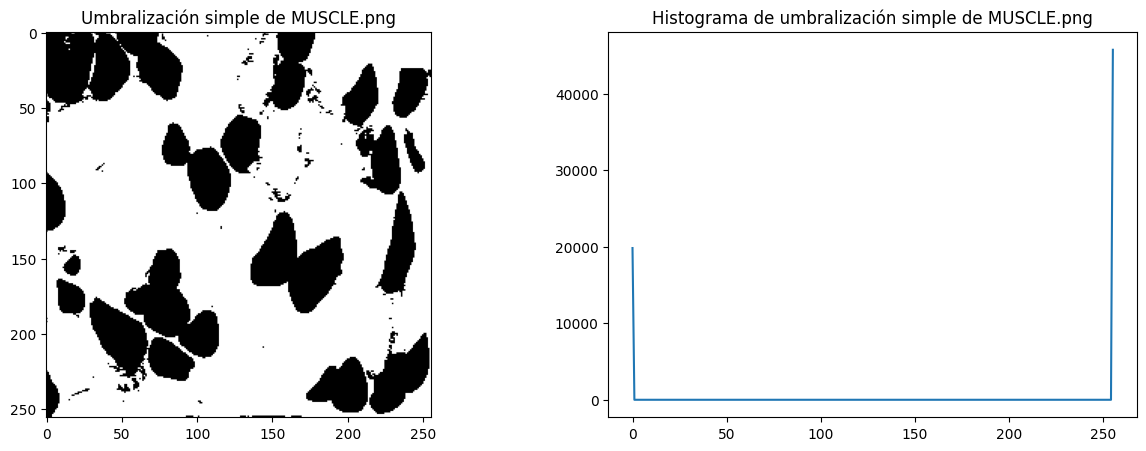

In [ ]:
# Umbralización simple con cv2.threshold()
rescaled_simple_muscle = cv2.threshold(muscle, S, 255, cv2.THRESH_BINARY)[1]

# Histograma de umbralización simple
hist_simple_muscle = cv2.calcHist([rescaled_simple_muscle], [0], None, [256], [0, 256])

# Visualización de umbralización de MUSCLE.png y su hist
fig_simple_muscle, ax_simple_muscle = plt.subplots(1, 2, figsize= (15, 5))
ax_simple_muscle[0].imshow(rescaled_simple_muscle, cmap='gray', vmin=0, vmax=255); ax_simple_muscle[0].set_title('Umbralización simple de MUSCLE.png')
ax_simple_muscle[1].plot(hist_simple_muscle); ax_simple_muscle[1].set_title('Histograma de umbralización simple de MUSCLE.png')
plt.show()

**¿Cuál es su conclusión?**

El resultado utilizando el módulo de umbralización simple es idéntico al obtenido mediante la calibración de intensidad en un rango estrecho.
La umbralización es un caso extremo de transformación lineal del histograma porque descarta toda la información tonal para resaltar únicamente la geometría y presencia de objetos (en este caso, las fibras musculares oscuras).

### **Métodos de Umbralización Automática (Otsu)**

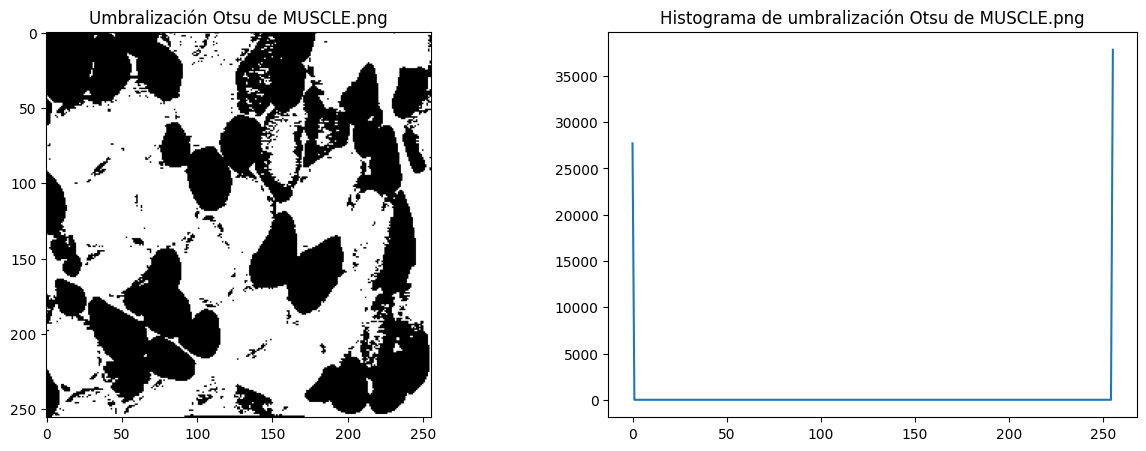

In [ ]:
# Métodos Otsu
otsu_muscle = cv2.threshold(muscle, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Histograma con método Otsu
hist_otsu_muscle = cv2.calcHist([otsu_muscle], [0], None, [256], [0, 256])

# Visualización de MUSCLE.png con Otsu y su histograma
fig_otsu_muscle, ax_otsu_muscle = plt.subplots(1, 2, figsize= (15, 5))
ax_otsu_muscle[0].imshow(otsu_muscle, cmap='gray', vmin=0, vmax=255); ax_otsu_muscle[0].set_title('Umbralización Otsu de MUSCLE.png')
ax_otsu_muscle[1].plot(hist_otsu_muscle); ax_otsu_muscle[1].set_title('Histograma de umbralización Otsu de MUSCLE.png')
plt.show()

**¿Qué resultado dan los métodos de umbralización automática (Otsu) basados sobre la varianza?**

El método de Otsu proporciona un umbral óptimo de manera estadística sin intervención humana (automáticamente).

Al aplicarlo a una imagen como MUSCLE.png, el algoritmo busca el valor de gris que mejor separa las dos poblaciones visibles en tu histograma (las fibras oscuras y el tejido claro).

**¿Cómo eligen estos métodos el umbral a aplicar?**

El algoritmo recorre todos los niveles de gris posibles (0-255) y calcula la varianza dentro de los dos grupos resultantes (objetos y fondo). El umbral ideal es aquel que hace que cada grupo sea lo más "puro" o compacto posible.

Simultáneamente, busca maximizar la distancia entre las medias de ambos grupos. Es decir, quiere que el "promedio" de lo negro esté lo más lejos posible del "promedio" de lo blanco.

**Comparación: Umbralización Manual vs. Otsu**

Logramos notar que en la imagen de Otsu, las fibras musculares se ven ligeramente más "gruesas" o pobladas que en la calibración manual porque el algoritmo desplazó el umbral hacia la derecha (un valor mayor a 90), lo que resulta en una mayor cantidad de píxeles asignados al nivel 0.

# **Umbralización doble**

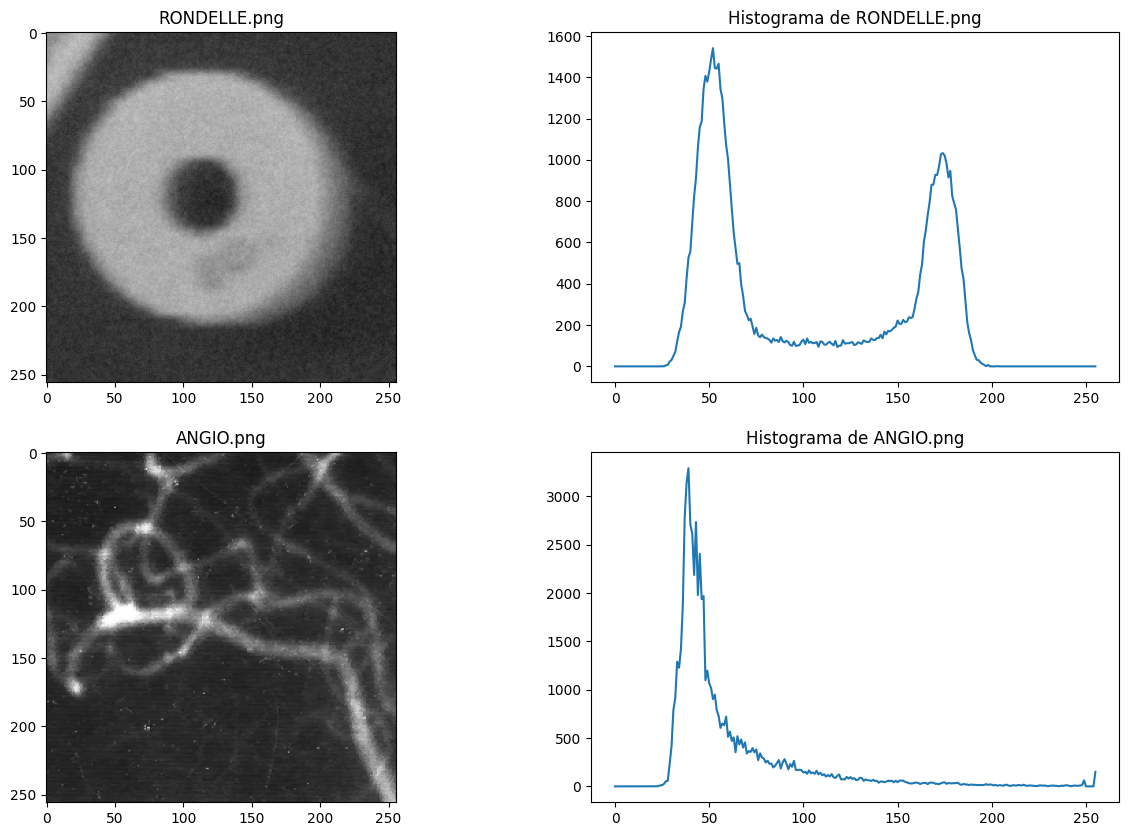

In [ ]:
# Carga de RONDELLE.png y ANGIO.png
rondelle = cv2.imread('images/RONDELLE.png', cv2.IMREAD_GRAYSCALE)
angio = cv2.imread('images/ANGIO.png', cv2.IMREAD_GRAYSCALE)

# Histogrmas de RONDELLE.png y ANGIO.png
hist_rondelle = cv2.calcHist([rondelle], [0], None, [256], [0, 256])
hist_angio = cv2.calcHist([angio], [0], None, [256], [0, 256])

# Visualización de RONDELLE.png y ANGIO.png junto a sus histogramas
fig_rondelle_angio, ax_rondelle_angio = plt.subplots(2, 2, figsize= (15, 10))
ax_rondelle_angio[0, 0].imshow(rondelle, cmap = 'gray', vmin= 0, vmax= 255); ax_rondelle_angio[0, 0].set_title('RONDELLE.png')
ax_rondelle_angio[0, 1].plot(hist_rondelle); ax_rondelle_angio[0, 1].set_title('Histograma de RONDELLE.png')
ax_rondelle_angio[1, 0].imshow(angio, cmap = 'gray', vmin= 0, vmax= 255); ax_rondelle_angio[1, 0].set_title('ANGIO.png')
ax_rondelle_angio[1, 1].plot(hist_angio); ax_rondelle_angio[1, 1].set_title('Histograma de ANGIO.png')
plt.show()

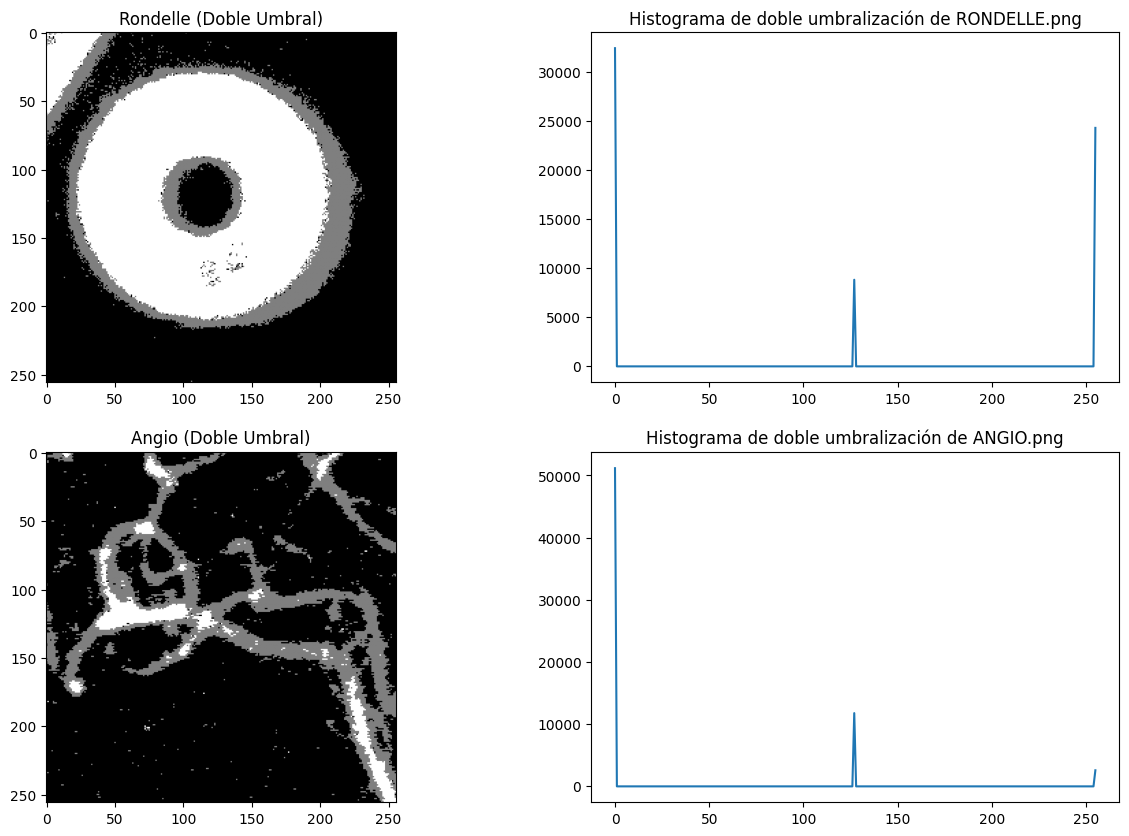

In [ ]:
# Definición de umbrales propuestos
low = 70
high = 140

# Umbralización doble
def tripleUmbral(img, low, high):
    result = np.zeros(img.shape, dtype=np.uint8)
    mask1 = cv2.threshold(img, high, 255, cv2.THRESH_BINARY)[1]
    mask2 = cv2.inRange(img, low, high-1)
    result[mask1 > 0] = 255
    result[mask2 > 0] = 127
    return result

# Imágenes finales de 3 clases
double_rondelle = tripleUmbral(rondelle, low, high)
double_angio = tripleUmbral(angio, low, high)

# Histogramas de umbralización doble
hist_double_rondelle = cv2.calcHist([double_rondelle], [0], None, [256], [0, 256])
hist_double_angio = cv2.calcHist([double_angio], [0], None, [256], [0, 256])

# Visualización de Umbralización doble para RONDELLE.png y ANGIO.png
fig_double_rondelle_angio, ax_double_rondelle_angio = plt.subplots(2, 2, figsize= (15, 10))
ax_double_rondelle_angio[0, 0].imshow(double_rondelle, cmap = 'gray', vmin= 0, vmax= 255); ax_double_rondelle_angio[0, 0].set_title('Rondelle (Doble Umbral)')
ax_double_rondelle_angio[0, 1].plot(hist_double_rondelle); ax_double_rondelle_angio[0, 1].set_title('Histograma de doble umbralización de RONDELLE.png')
ax_double_rondelle_angio[1, 0].imshow(double_angio, cmap = 'gray', vmin= 0, vmax= 255); ax_double_rondelle_angio[1, 0].set_title('Angio (Doble Umbral)')
ax_double_rondelle_angio[1, 1].plot(hist_double_angio); ax_double_rondelle_angio[1, 1].set_title('Histograma de doble umbralización de ANGIO.png')
plt.show()

**Resultados de la Umbralización Doble:**

* En Rondelle vemos la separación entre el fondo (clase 0), las zonas de brillo medio de la arandela (clase 128) y los reflejos o zonas más claras (clase 255).

* En Angio podemos diferenciar entre el tejido de fondo, otros órganos (gris) y los vasos sanguíneos que contienen el agente de contraste (blanco).

**Rol y Condiciones de Utilización**

La umbralización doble tiene como objetivo principal la segmentación de imágenes donde los objetos de interés no pueden definirse por un único valor de intensidad, sino que se encuentran en un rango específico de gris o pertenecen a categorías distintas.

Se utiliza cuando el histograma presenta múltiples picos o regiones de interés que se solapan parcialmente. Es indispensable cuando se necesita separar un objeto del fondo y, *al mismo tiempo*, clasificar diferentes partes de ese objeto según su reflectancia o densidad.

**Comportamiento y Análisis Comparativo**

1. Conectividad:

* Ventaja: evita que objetos que están físicamente unidos se "rompan" en la imagen segmentada debido a variaciones sutiles de iluminación, esto es gracias a la inclusión de una clase intermedia (gris 128).

* Desventaja: Si los umbrales no están bien ajustados, se pueden crear "islas" de píxeles desconectados que dificultan algoritmos posteriores de etiquetado de componentes.

2. Extracción de Objetos Complejos o Ramificados:

* Ventaja: permite capturar la ramificación completa, evitando que las ramas más finas desaparezcan (como en una umbralización simple alta).

* Desventaja: la clase intermedia puede introducir "ruido de fondo" si el tejido circundante tiene intensidades similares a las ramificaciones.

3. Calidad de Contornos y Fronteras:

* Ventaja: se generan transiciones más suaves porque no hay cambios abruptos de 0 a 255, lo cual reduce el efecto de "aliasing" o bordes dentados.

* Desventaja: La frontera entre la clase intermedia (128) y la clase alta (255) puede volverse ambigua, lo que dificulta la medición exacta del perímetro o área si se busca una precisión geométrica absoluta del objeto más brillante.

# **Ejercicio de síntesis taller 2**

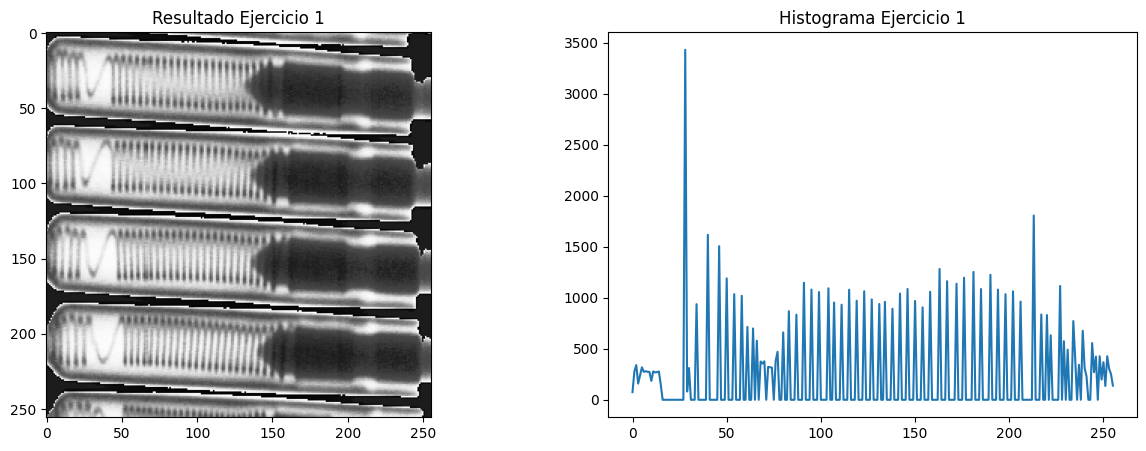

In [ ]:
# Ejercicio 1
bougieLog = np.log1p(bougies)
multi = np.multiply(bougieLog, 55)
resultado = multi.astype(np.uint8)
resultadoEcualizado = cv2.equalizeHist(resultado)
resultadoFinal = resultadoEcualizado

# Histograma para chequear
hist_resultado = cv2.calcHist([resultadoFinal], [0], None, [256], [0, 256])

# Visualización de resultados
fig_resultado, ax_resultado = plt.subplots(1, 2, figsize= (15, 5))
ax_resultado[0].imshow(resultadoFinal, cmap='gray', vmin=0, vmax=255); ax_resultado[0].set_title('Resultado Ejercicio 1')
ax_resultado[1].plot(hist_resultado); ax_resultado[1].set_title('Histograma Ejercicio 1')
plt.show()

In [ ]:
# Ejercicio 2